# **03 - DataVisualization**

## Objectives

* Answer Business requirement 1:
  * The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train

## Outputs

* Avarage and variability of images per label plot.
* Plot to distinguish the contrast between healthy cherry leaves from leaves with powdery mildew.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

* No additional comments. 



---

# Import libraries

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import joblib

from matplotlib.image import imread

---

# Set Data directory variables

## Change working directory

* Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

* The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [7]:
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves'

## Input directory variables

In [8]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_data_dir = data_dir + '/train'
val_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

## Output directory variables

In [19]:
if 'outputs' not in os.listdir(current_dir):
    os.makedirs(name='outputs')

def create_output_dir(version_index):
    while True:
        try:
            os.makedirs(name=f'outputs/Version{version_index}')
            return f'outputs/Version{version_index}'
        except:
            version_index += 1
version_output = create_output_dir(1)
print(f'Current output folder is {version_output}')

Current output folder is outputs/Version4


## Data label names variables

In [10]:
labels = os.listdir(train_data_dir)
print(f'Datalabels are {labels}')

Datalabels are ['healthy', 'powdery_mildew']


---

# Labels Montage

## Change working directory

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [11]:
import itertools
import random
from matplotlib.image import imread

Sample data from label: healthy


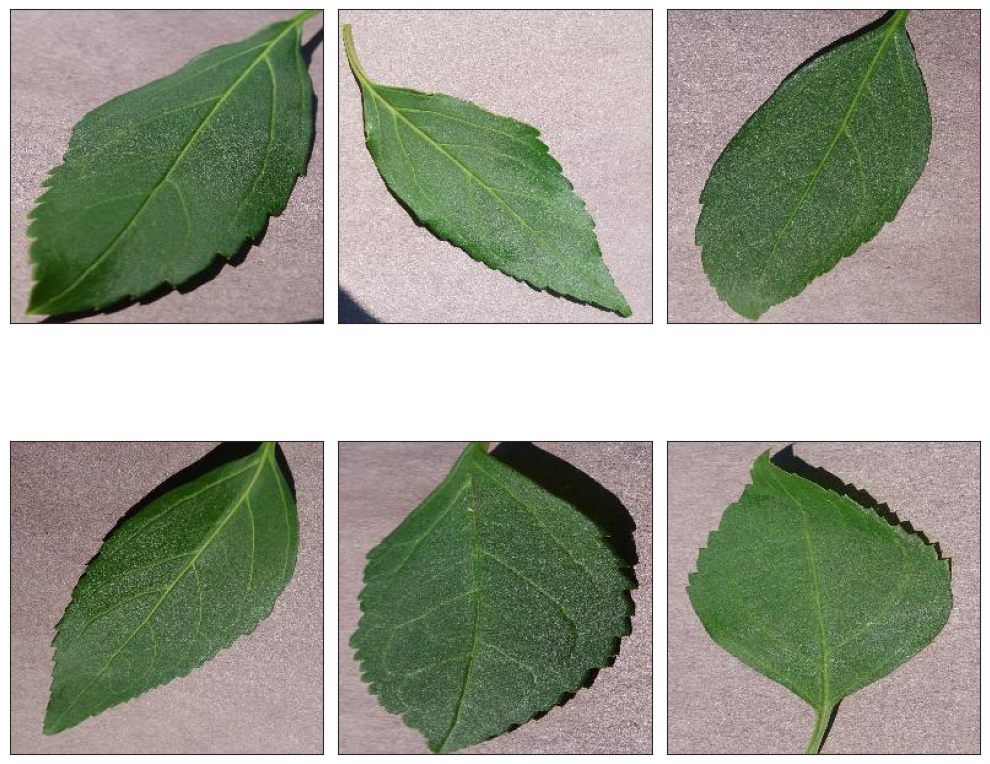

Sample data from label: powdery_mildew


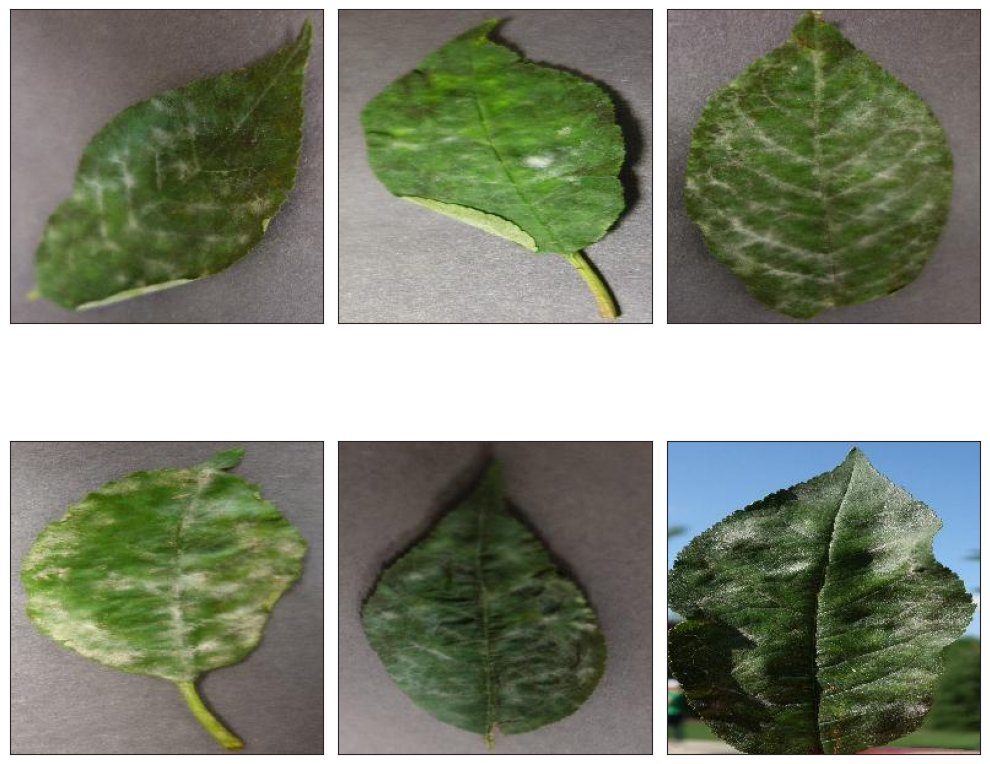

In [25]:
montage_rows = 2
montage_cols = 3
figsize=(10,10)

sns.set_style("white")
labels = os.listdir(train_data_dir)

for label in labels:
    print(f'Sample data from label: {label}')
    imgs_list = os.listdir(train_data_dir + '/' + label)
    imgs_sample = random.sample(imgs_list, montage_rows * montage_cols)

    # create list of axes indices based on montage_rows and montage_cols
    pos_index = []
    for i in range(0, montage_rows):
        for j in range(0, montage_cols):
            pos_index.append([i, j])

    # create a Figure and display images
    fig, axes = plt.subplots(nrows=montage_rows,ncols=montage_cols, figsize=figsize)
    for k in range(0, len(imgs_sample)):
        img = imread(train_data_dir + '/' + label + '/' + imgs_sample[k], 0)
        img_shape = img.shape
        axes[pos_index[k][0], pos_index[k][1]].imshow(img)
        axes[pos_index[k][0], pos_index[k][1]].set_xticks([])
        axes[pos_index[k][0], pos_index[k][1]].set_yticks([])
    plt.tight_layout()
    plt.show()
    

---

# Image Avarage and Variability

## Change working directory

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

---

# Label Avarage Differentiation

## Change working directory

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

---

# Conclusions and Next Steps

* Dataset is collected from Kaggle and stored in inputs folder.
* No input data is pushed to github repo
* Next step is data visualization found in 02 - DataVisualization notebook